## Preprocessing

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
updated_df = application_df.drop(columns=['EIN','NAME'])

In [3]:
# Determine the number of unique values in each column
updated_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_value_counts = updated_df.value_counts('APPLICATION_TYPE')

application_type_value_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T17','T15','T29','T14','T25','T2','T12','T13','T9']

# Replace in dataframe
for app in application_types_to_replace:
   updated_df['APPLICATION_TYPE'] = updated_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
updated_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = updated_df.value_counts('CLASSIFICATION')
classification_value_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2380        1
C2500        1
C2561        1
C8210        1
Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
c_value_counts_filtered = updated_df[updated_df['CLASSIFICATION'].isin(classification_value_counts[classification_value_counts > 1].index)]
c_value_counts_filtered['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C1720        6
C2400        6
C1600        5
C1257        5
C1260        3
C2710        3
C0           3
C1267        2
C1256        2
C1234        2
C1246        2
C3200        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
class_to_keep = ['C2100','C3000','C1200','C2000','C1000']
classifications_to_replace = [x for x in updated_df['CLASSIFICATION'] if x not in class_to_keep]

# Replace in dataframe
for cls in classifications_to_replace:
    updated_df['CLASSIFICATION'] = updated_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
updated_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Display updated DF for ease of determing the dummy data
updated_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [10]:
# Check the datatypes to determine dummy columns
updated_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
cols_dummies = ['AFFILIATION','USE_CASE','ORGANIZATION','SPECIAL_CONSIDERATIONS','APPLICATION_TYPE','CLASSIFICATION','INCOME_AMT']
dummies = updated_df[cols_dummies]
dummies_df = pd.get_dummies(dummies)
dummies_df

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,...,CLASSIFICATION_Other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
34297,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
# Drop the dummified columns from the updated df then Concatenate the dummies_df with the updated_df
dropped_dummies_df  = updated_df.drop(columns=cols_dummies)
transformed_application_df = pd.concat([dropped_dummies_df,dummies_df],axis = 1)
transformed_application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,...,CLASSIFICATION_Other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,1,5000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,1,5000,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34297,1,5000,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [74]:
# Change the split of the of training and testing data in the original input data
y = transformed_application_df['IS_SUCCESSFUL']
X = transformed_application_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 1)

In [75]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Determine the Ideal Hyperparameters

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units= hp.Int('first_units',
        min_value = 1,
        max_value = 10,
        step=2), activation=activation, input_dim= 43))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value = 1,
            max_value = 10,
            step = 2),
            activation = activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 01m 24s]
val_accuracy: 0.7282798886299133

Best val_accuracy So Far: 0.7337609529495239
Total elapsed time: 00h 24m 20s


In [ ]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 3, 'num_layers': 2, 'units_0': 9, 'units_1': 1, 'units_2': 9, 'units_3': 9, 'units_4': 5, 'units_5': 1, 'tuner/epochs': 7, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 9, 'num_layers': 4, 'units_0': 9, 'units_1': 9, 'units_2': 9, 'units_3': 1, 'units_4': 3, 'units_5': 9, 'tuner/epochs': 3, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 3, 'num_layers': 2, 'units_0': 9, 'units_1': 1, 'units_2': 9, 'units_3': 9, 'units_4': 5, 'units_5': 1, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0051'}


In [ ]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5734 - accuracy: 0.7338 - 481ms/epoch - 2ms/step
Loss: 0.5733532905578613, Accuracy: 0.7337609529495239
268/268 - 1s - loss: 0.5614 - accuracy: 0.7332 - 516ms/epoch - 2ms/step
Loss: 0.5613529086112976, Accuracy: 0.7331778407096863
268/268 - 0s - loss: 0.5706 - accuracy: 0.7325 - 492ms/epoch - 2ms/step
Loss: 0.5706217288970947, Accuracy: 0.732478141784668


In [ ]:
# Get second best model hyperparameters
second_hyper = tuner.get_best_hyperparameters(2)[1]
second_hyper.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 4,
 'units_0': 9,
 'units_1': 9,
 'units_2': 9,
 'units_3': 1,
 'units_4': 3,
 'units_5': 9,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [ ]:
# Compare the performance to the second-best model
second_model = tuner.get_best_models(2)[1]
model_loss, model_accuracy = second_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5614 - accuracy: 0.7332 - 556ms/epoch - 2ms/step
Loss: 0.5613529086112976, Accuracy: 0.7331778407096863


## Compile, Train and Evaluate the Model

In [123]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  9
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Add a third hidden layer for optimization
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 9)                 396       
                                                                 
 dense_77 (Dense)            (None, 7)                 70        
                                                                 
 dense_78 (Dense)            (None, 8)                 64        
                                                                 
 dense_79 (Dense)            (None, 1)                 9         
                                                                 
Total params: 539 (2.11 KB)
Trainable params: 539 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [125]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs = 100)

Epoch 1/100
751/751 [==============================] - 2s 1ms/step - loss: 0.6069 - accuracy: 0.6963
Epoch 2/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5679 - accuracy: 0.7255
Epoch 3/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5604 - accuracy: 0.7279
Epoch 4/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5571 - accuracy: 0.7288
Epoch 5/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7286
Epoch 6/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7299
Epoch 7/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5530 - accuracy: 0.7304
Epoch 8/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7303
Epoch 9/100
751/751 [==============================] - 1s 2ms/step - loss: 0.5518 - accuracy: 0.7313
Epoch 10/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5511 - accura

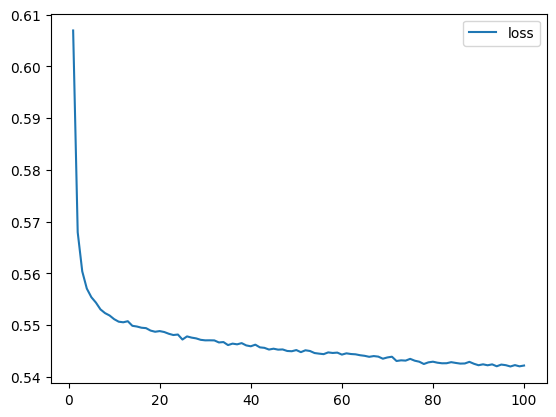

In [126]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

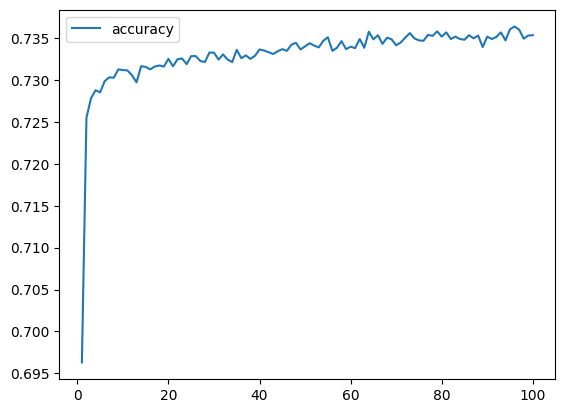

In [127]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [128]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 0s - loss: 0.5508 - accuracy: 0.7306 - 348ms/epoch - 1ms/step
Loss: 0.5507833957672119, Accuracy: 0.7306122183799744
